<a href="https://colab.research.google.com/github/mar25-iia2-radiographies/01_data_exploration/blob/main/01_data_exploration_romuald.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration de la structure du dossier**

In [14]:
import kagglehub
from pathlib import Path
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("Le dataset a été téléchargé ici :", path)

base_path = Path(path)
data_path = base_path / "COVID-19_Radiography_Dataset"

print("\n" + "="*80)
print("STRUCTURE COMPLÈTE - TOUS DOSSIERS/SOUS-DOSSIERS")
print("="*80)

# 1. RACINE
print("\n📁 RACINE:")
for item in sorted(base_path.iterdir()):
    print(f"  {item.name} ({item.stat().st_size/1024/1024:.1f}MB)")

# 2. EXPLORATION RÉCURSIVE COMPLÈTE
print("\n📂 ARBRE COMPLET (3 niveaux max):")
def print_tree(path, prefix="", max_depth=3, current_depth=0):
    if current_depth > max_depth:
        return

    items = sorted(path.iterdir())
    for i, item in enumerate(items):
        is_last = i == len(items) - 1
        connector = "└── " if is_last else "├── "
        print(f"{prefix}{connector}{item.name}")

        if item.is_dir():
            new_prefix = prefix + ("    " if is_last else "│   ")
            print_tree(item, new_prefix, max_depth, current_depth + 1)

print_tree(base_path, max_depth=2)

# 3. COMPTE IMAGES PAR DOSSIER
print("\n📊 COMPTE IMAGES PAR DOSSIER:")
def count_images_recursively(root):
    for root_dir, dirs, files in os.walk(root):
        png_count = len([f for f in files if f.lower().endswith('.png')])
        jpg_count = len([f for f in files if f.lower().endswith('.jpg')])

        if png_count + jpg_count > 0:
            rel_path = os.path.relpath(root_dir, base_path)
            print(f"  {rel_path:<40} : {png_count:>4} PNG + {jpg_count:>4} JPG = {png_count+jpg_count:>5} total")

count_images_recursively(base_path)

# 4. RÉSUMÉ FINAL
print("\n" + "="*80)
print("RÉSUMÉ FINAL")
print("="*80)
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
total_images = 0

for cat in categories:
    cat_path = data_path / cat
    if cat_path.exists():
        all_images = list(cat_path.rglob('*.png')) + list(cat_path.rglob('*.jpg'))
        count = len(all_images)
        total_images += count
        print(f"✅ {cat}: {count:,} images")
        if count > 0:
            print(f"   Premier: {all_images[0].name}")
    else:
        print(f"❌ {cat}: DOSSIER MANQUANT")

print(f"\n🎯 TOTAL IMAGES: {total_images:,}")



Using Colab cache for faster access to the 'covid19-radiography-database' dataset.
Le dataset a été téléchargé ici : /kaggle/input/covid19-radiography-database

STRUCTURE COMPLÈTE - TOUS DOSSIERS/SOUS-DOSSIERS

📁 RACINE:
  COVID-19_Radiography_Dataset (0.0MB)

📂 ARBRE COMPLET (3 niveaux max):
└── COVID-19_Radiography_Dataset
    ├── COVID
    │   ├── images
    │   └── masks
    ├── COVID.metadata.xlsx
    ├── Lung_Opacity
    │   ├── images
    │   └── masks
    ├── Lung_Opacity.metadata.xlsx
    ├── Normal
    │   ├── images
    │   └── masks
    ├── Normal.metadata.xlsx
    ├── README.md.txt
    ├── Viral Pneumonia
    │   ├── images
    │   └── masks
    └── Viral Pneumonia.metadata.xlsx

📊 COMPTE IMAGES PAR DOSSIER:
  COVID-19_Radiography_Dataset/Normal/images : 10192 PNG +    0 JPG = 10192 total
  COVID-19_Radiography_Dataset/Normal/masks : 10192 PNG +    0 JPG = 10192 total
  COVID-19_Radiography_Dataset/Lung_Opacity/images : 6012 PNG +    0 JPG =  6012 total
  COVID-19_Radiogra

# **Visualisation**


RÉPARTITION PAR TYPE DE FICHIER (EXTENSION) :
  .png       : 42330 fichiers (100.0 %)
  .xlsx      :     4 fichiers (  0.0 %)
  .txt       :     1 fichiers (  0.0 %)


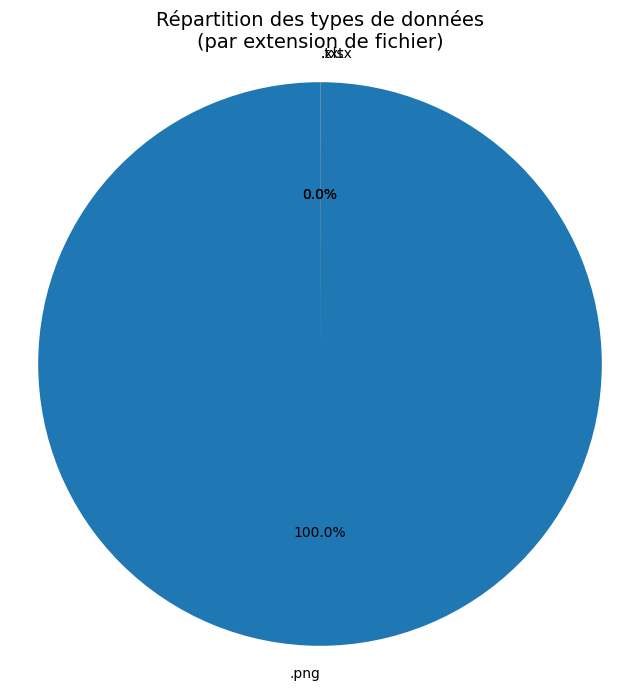

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Comptage des fichiers par extension dans COVID-19_Radiography_Dataset
ext_counter = Counter()

for root_dir, dirs, files in os.walk(data_path):
    for f in files:
        # extension en minuscule (ex: '.png', '.xlsx', '.txt', '')
        ext = os.path.splitext(f)[1].lower()
        if ext == '':
            ext = '(sans extension)'
        ext_counter[ext] += 1

# Affichage texte
print("\nRÉPARTITION PAR TYPE DE FICHIER (EXTENSION) :")
total_files = sum(ext_counter.values())
for ext, count in ext_counter.most_common():
    pct = count / total_files * 100
    print(f"  {ext:10s} : {count:5d} fichiers ({pct:5.1f} %)")

# Préparation données camembert
labels = []
sizes = []
for ext, count in ext_counter.most_common():
    labels.append(ext if ext != '' else '(sans)')
    sizes.append(count)

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Répartition des types de données\n(par extension de fichier)", fontsize=14)
plt.axis('equal')
plt.show()



RÉPARTITION DES TYPES DE FICHIERS :
  images  : 21165
  masks   : 21165
  metadata: 4
  autres  : 1

TOTAL PNG (images + masks) : 42330
  - images : 21165
  - masks  : 21165
TOTAL FICHIERS (tous types) : 42335


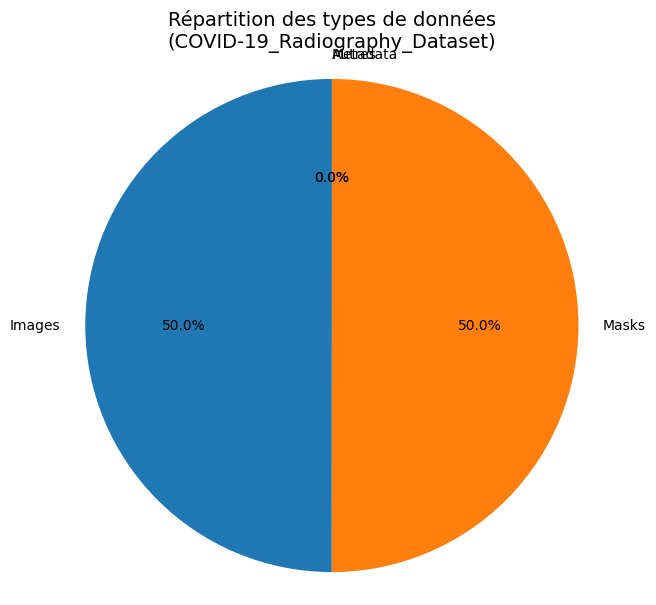

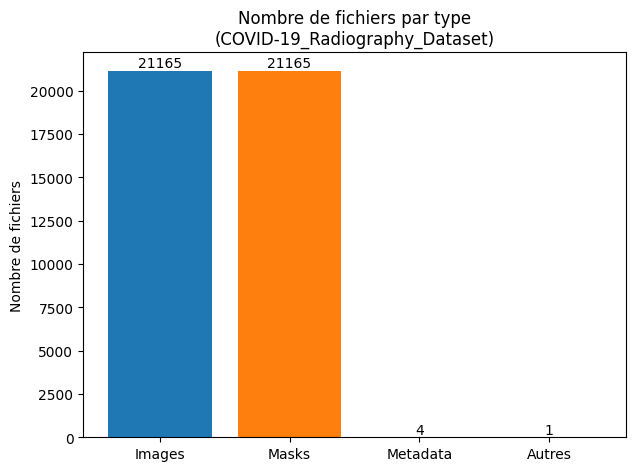

In [19]:
import matplotlib.pyplot as plt

# Comptage des fichiers par type dans COVID-19_Radiography_Dataset
types_counts = {
    'images': 0,
    'masks': 0,
    'metadata': 0,
    'autres': 0
}

for root_dir, dirs, files in os.walk(data_path):
    for f in files:
        f_lower = f.lower()
        if f_lower.endswith('.png'):
            if 'images' in root_dir.lower():
                types_counts['images'] += 1
            elif 'masks' in root_dir.lower():
                types_counts['masks'] += 1
            else:
                types_counts['autres'] += 1
        elif f_lower.endswith('.xlsx'):
            types_counts['metadata'] += 1
        else:
            types_counts['autres'] += 1

# Affichage clair des nombres
total_png = types_counts['images'] + types_counts['masks']
total_all = sum(types_counts.values())

print("\nRÉPARTITION DES TYPES DE FICHIERS :")
for k, v in types_counts.items():
    print(f"  {k:8s}: {v}")

print(f"\nTOTAL PNG (images + masks) : {total_png}")
print(f"  - images : {types_counts['images']}")
print(f"  - masks  : {types_counts['masks']}")
print(f"TOTAL FICHIERS (tous types) : {total_all}")

# Camembert
labels = ['Images', 'Masks', 'Metadata', 'Autres']
sizes  = [types_counts['images'],
          types_counts['masks'],
          types_counts['metadata'],
          types_counts['autres']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title("Répartition des types de données\n(COVID-19_Radiography_Dataset)", fontsize=14)
plt.axis('equal')
plt.show()

# --- 2ᵉ VISU : graph sur les NOMBRES ---

# Données brutes
labels = ['Images', 'Masks', 'Metadata', 'Autres']
counts = [types_counts['images'],
          types_counts['masks'],
          types_counts['metadata'],
          types_counts['autres']]

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f'])

# Ajout des valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title("Nombre de fichiers par type\n(COVID-19_Radiography_Dataset)")
plt.ylabel("Nombre de fichiers")
plt.show()


Création du dataset

In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# CHEMINS EXACTS
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"

categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

# Dataset de travail : SEULEMENT images/
image_paths = {}
for cat in categories:
    image_paths[cat] = list((data_path / cat / 'images').rglob('*.png'))
    print(f"✅ {cat}: {len(image_paths[cat]):,} images")

print(f"\n🎯 TOTAL: {sum(len(v) for v in image_paths.values()):,} images")


✅ COVID: 3,616 images
✅ Normal: 10,192 images
✅ Lung_Opacity: 6,012 images
✅ Viral Pneumonia: 1,345 images

🎯 TOTAL: 21,165 images


# **Images grayscale**

=== VÉRIFICATION GRAYSCALE (100 images/catégorie) ===

COVID: 100 images analysées
  COVID-1994.png: L
  COVID-1825.png: L
  COVID-517.png: L

Normal: 100 images analysées

Lung_Opacity: 100 images analysées

Viral Pneumonia: 100 images analysées

=== RÉSULTAT GRAYSCALE PAR CATÉGORIE ===
          category  total_checked  grayscale  color  pct_grayscale
0            COVID            100        100      0          100.0
1           Normal            100        100      0          100.0
2     Lung_Opacity            100        100      0          100.0
3  Viral Pneumonia            100         88     12           88.0

🎯 TOTAL ANALYSÉ: 400 images
   Grayscale: 388 (97.0%)
   Couleur:   12 (3.0%)


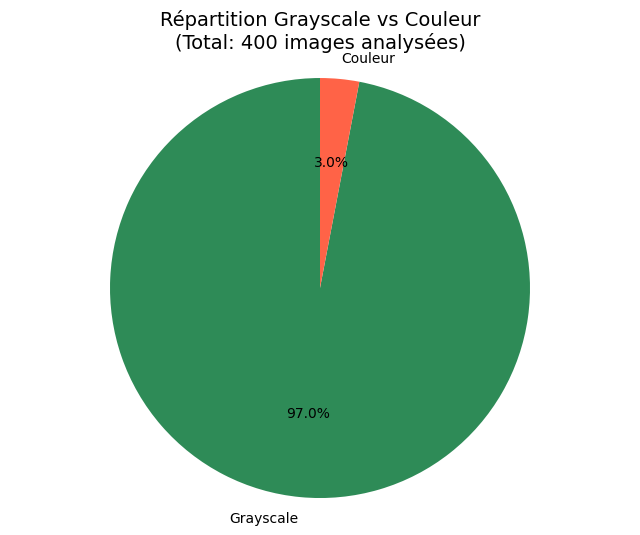

In [22]:
from pathlib import Path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Chemins exacts
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("=== VÉRIFICATION GRAYSCALE (100 images/catégorie) ===")

grayscale_stats = []
total_grayscale, total_color = 0, 0

for cat in categories:
    cat_path = data_path / cat / 'images'
    images = list(cat_path.glob('*.png'))[:100]

    print(f"\n{cat}: {len(images)} images analysées")
    g_count, c_count = 0, 0

    for img_path in images:
        try:
            with Image.open(img_path) as img:
                if img.mode == 'L':
                    g_count += 1
                    total_grayscale += 1
                else:
                    c_count += 1
                    total_color += 1

                if len(grayscale_stats) == 0 and g_count + c_count <= 3:
                    print(f"  {img_path.name}: {img.mode}")
        except:
            pass

    grayscale_stats.append({
        'category': cat,
        'total_checked': len(images),
        'grayscale': g_count,
        'color': c_count,
        'pct_grayscale': g_count / len(images) * 100
    })

grayscale_df = pd.DataFrame(grayscale_stats)
print("\n=== RÉSULTAT GRAYSCALE PAR CATÉGORIE ===")
print(grayscale_df.round(1))

# CAMEMBERT TOTAL
total_images = total_grayscale + total_color
print(f"\n🎯 TOTAL ANALYSÉ: {total_images} images")
print(f"   Grayscale: {total_grayscale} ({total_grayscale/total_images*100:.1f}%)")
print(f"   Couleur:   {total_color} ({total_color/total_images*100:.1f}%)")

plt.figure(figsize=(8, 6))
plt.pie([total_grayscale, total_color],
        labels=['Grayscale', 'Couleur'],
        autopct='%1.1f%%',
        colors=['#2E8B57', '#FF6347'],
        startangle=90)
plt.title(f'Répartition Grayscale vs Couleur\n(Total: {total_images} images analysées)', fontsize=14)
plt.axis('equal')
plt.show()


## **Nombres d'images par catégorie**

NOMBRE TOTAL D'IMAGES PAR CATÉGORIE (dossier images/ complet)
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images

RÉSUMÉ NOMBRE D'IMAGES :
          category  total_images
0            COVID          3616
1           Normal         10192
2     Lung_Opacity          6012
3  Viral Pneumonia          1345


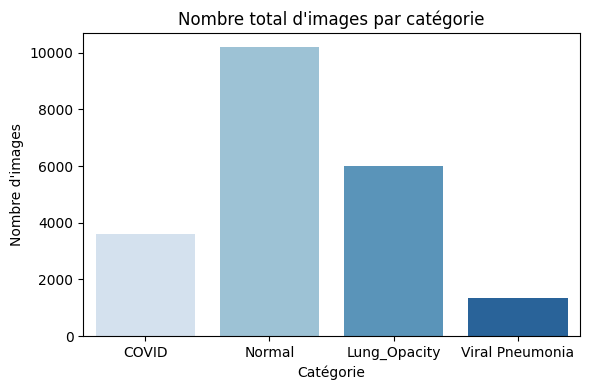

In [26]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemins
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("="*80)
print("NOMBRE TOTAL D'IMAGES PAR CATÉGORIE (dossier images/ complet)")
print("="*80)

count_stats = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    images = list(cat_path.glob('*.png'))
    n = len(images)
    count_stats.append({'category': cat, 'total_images': n})
    print(f"{cat}: {n} images")

count_df = pd.DataFrame(count_stats)
print("\nRÉSUMÉ NOMBRE D'IMAGES :")
print(count_df)

# Graphe 1 : nombre total d'images par catégorie
plt.figure(figsize=(6, 4))
sns.barplot(data=count_df, x='category', y='total_images', palette='Blues')
plt.title("Nombre total d'images par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.tight_layout()
plt.show()


# **Tailles des images par catégorie**


ANALYSE DES TAILLES D'IMAGES PAR CATÉGORIE (TOUTES LES IMAGES)

COVID: 3616 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    3616
Name: count, dtype: int64

Normal: 10192 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    10192
Name: count, dtype: int64

Lung_Opacity: 6012 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    6012
Name: count, dtype: int64

Viral Pneumonia: 1345 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    1345
Name: count, dtype: int64

RÉSUMÉ GLOBAL DES TAILLES :
          category  total_checked  unique_sizes most_common_size  \
0            COVID           3616             1       (299, 299)   
1           Normal          10192             1       (299, 299)   
2     Lung_Opacity           6012             1       (299, 299)   
3  Viral Pneumonia           1345             1       (299, 299)   

   most_common_count  
0  

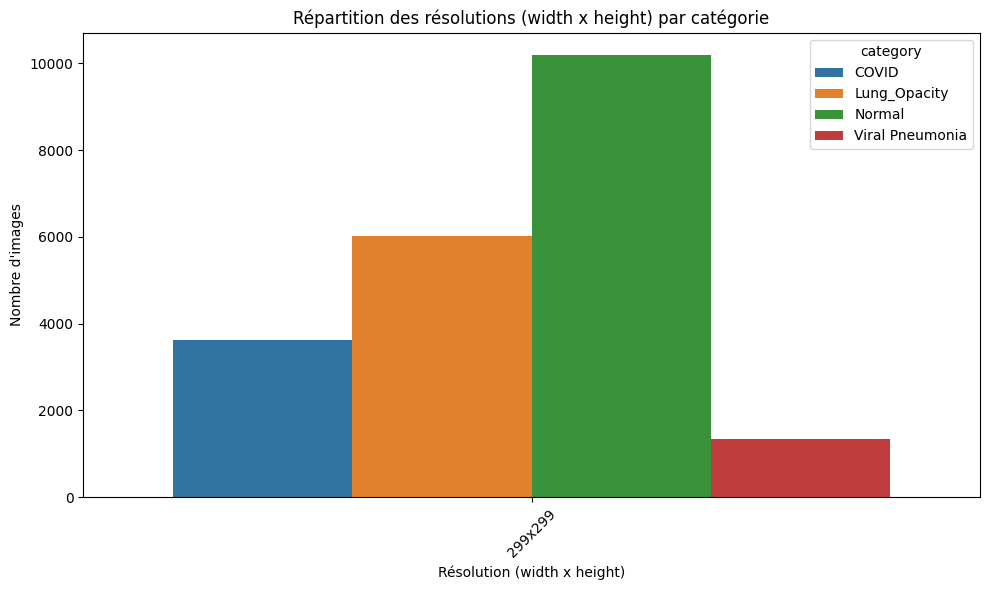

In [28]:
from pathlib import Path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemins exacts
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\n" + "="*80)
print("ANALYSE DES TAILLES D'IMAGES PAR CATÉGORIE (TOUTES LES IMAGES)")
print("="*80)

size_stats = []    # résumé global par catégorie
all_sizes = []     # toutes les images, pour graphes

for cat in categories:
    cat_path = data_path / cat / 'images'
    images = list(cat_path.glob('*.png'))   # ICI : TOUTES les images

    sizes = []
    for img_path in images:
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                sizes.append((w, h))
                all_sizes.append({
                    'category': cat,
                    'width': w,
                    'height': h,
                    'size_str': f"{w}x{h}"
                })
        except:
            pass

    if len(sizes) == 0:
        print(f"\n{cat}: aucune image lue.")
        continue

    size_series = pd.Series(sizes)
    size_counts = size_series.value_counts().sort_index()

    print(f"\n{cat}: {len(sizes)} images analysées")
    print("Tailles les plus fréquentes (width, height -> count) :")
    print(size_counts.head(10))

    size_stats.append({
        'category': cat,
        'total_checked': len(sizes),
        'unique_sizes': len(size_counts),
        'most_common_size': size_counts.index[0],
        'most_common_count': size_counts.iloc[0]
    })

# Résumé global
size_df = pd.DataFrame(size_stats)
print("\nRÉSUMÉ GLOBAL DES TAILLES :")
print(size_df)

# ===================== GRAPHIQUES =====================

sizes_df = pd.DataFrame(all_sizes)

# Graphe 1 : histogramme des résolutions (width x height) par catégorie
size_counts_all = (
    sizes_df
    .groupby(['category', 'size_str'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=size_counts_all, x='size_str', y='count', hue='category')
plt.title("Répartition des résolutions (width x height) par catégorie")
plt.xlabel("Résolution (width x height)")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# **Niveaux de gris par categorie et global**


DENSITÉ LISSEE DES PIXELS PAR CATÉGORIE (toutes les images)
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images


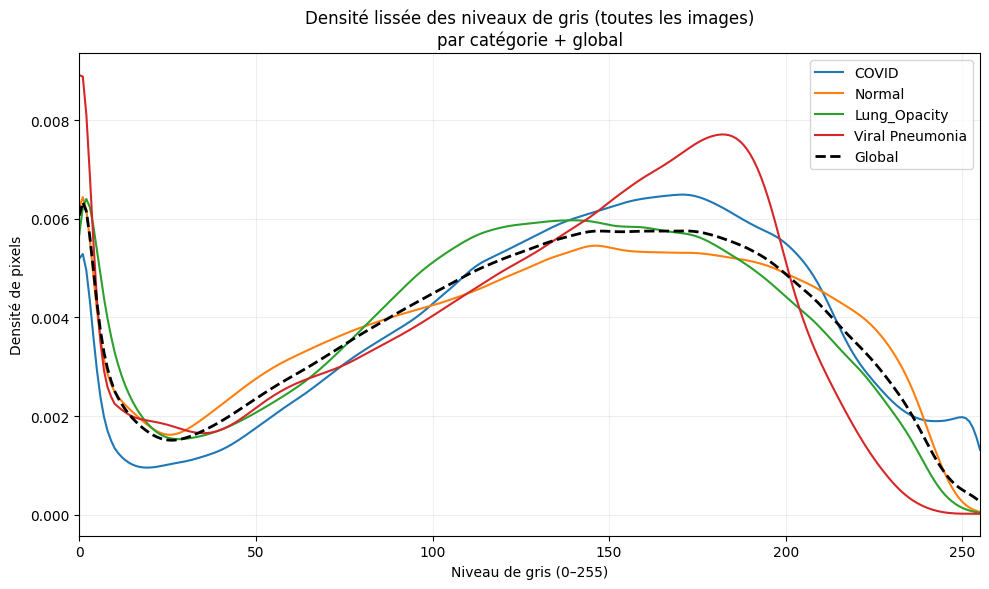

In [33]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Chemins
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

bins = np.arange(257)  # 0..256
x = np.arange(256)

print("\n" + "="*80)
print("DENSITÉ LISSEE DES PIXELS PAR CATÉGORIE (toutes les images)")
print("="*80)

hist_by_cat = {}
total_hist = np.zeros(256, dtype=np.float64)

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))  # TOUTES les images
    print(f"{cat}: {len(image_paths)} images")

    hist_cat = np.zeros(256, dtype=np.float64)
    for img_path in image_paths:
        try:
            img = Image.open(img_path).convert('L')
            arr = np.array(img, dtype=np.uint8)
            h, _ = np.histogram(arr, bins=bins, range=(0, 256))
            hist_cat += h
            total_hist += h
        except:
            continue

    if hist_cat.sum() == 0:
        continue
    hist_by_cat[cat] = hist_cat

# --- lissage gaussien simple ---
def gaussian_smooth(hist, sigma=3):
    radius = int(3 * sigma)
    t = np.arange(-radius, radius + 1)
    kernel = np.exp(-0.5 * (t / sigma) ** 2)
    kernel /= kernel.sum()
    return np.convolve(hist, kernel, mode='same')

plt.figure(figsize=(10, 6))

# courbes par catégorie
for cat, h in hist_by_cat.items():
    h_norm = h / h.sum()
    h_smooth = gaussian_smooth(h_norm, sigma=3)
    plt.plot(x, h_smooth, label=cat)

# courbe globale
global_norm = total_hist / total_hist.sum()
global_smooth = gaussian_smooth(global_norm, sigma=3)
plt.plot(x, global_smooth, color='black', linestyle='--', linewidth=2, label='Global')

plt.xlim(0, 255)
plt.title("Densité lissée des niveaux de gris (toutes les images)\npar catégorie + global")
plt.xlabel("Niveau de gris (0–255)")
plt.ylabel("Densité de pixels")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()





Calcul de la luminosité moyenne par image...
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images

Statistiques par catégorie (y compris Global) :
                   count    mean    std    min     25%     50%     75%     max
category                                                                      
COVID             3616.0  139.52  25.03  25.51  126.88  142.59  155.97  216.56
Global           21165.0  129.91  23.49  25.51  113.31  127.13  146.68  229.14
Lung_Opacity      6012.0  126.02  23.57  32.23  110.58  120.82  142.10  229.14
Normal           10192.0  129.39  22.45  26.44  113.52  125.51  143.64  201.85
Viral Pneumonia   1345.0  125.37  18.98  64.77  113.50  126.86  137.79  193.69


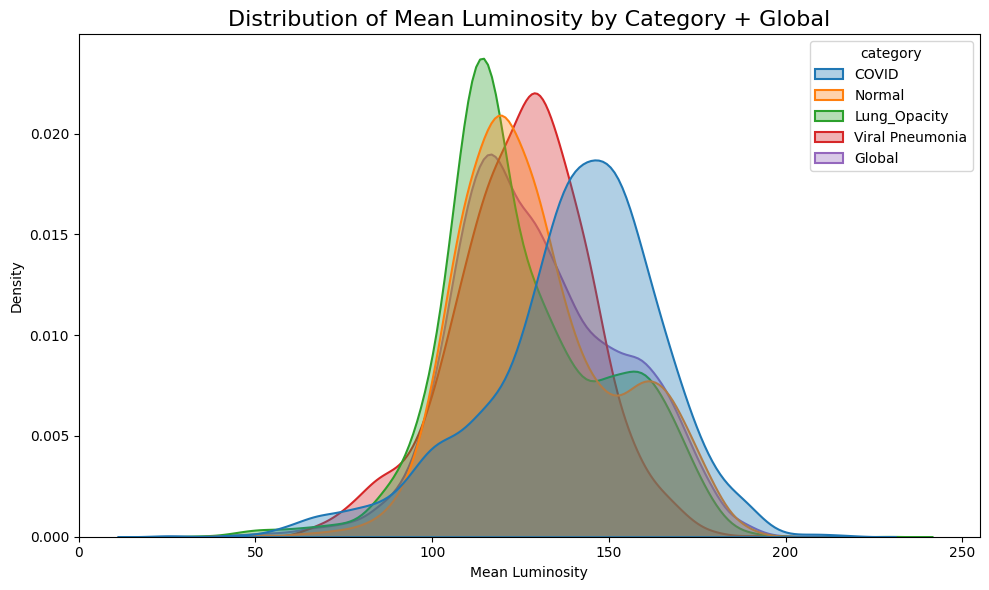

In [35]:
from pathlib import Path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemins
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\nCalcul de la luminosité moyenne par image...")

rows = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))  # toutes les images
    print(f"{cat}: {len(image_paths)} images")

    for img_path in image_paths:
        try:
            img = Image.open(img_path).convert('L')
            arr = np.array(img, dtype=np.float32)
            mean_lum = arr.mean()
            rows.append({
                'category': cat,
                'filename': img_path.name,
                'mean_luminosity': mean_lum
            })
        except:
            continue

lum_df = pd.DataFrame(rows)

# Ajout de la catégorie globale
global_df = lum_df.copy()
global_df['category'] = 'Global'
lum_all = pd.concat([lum_df, global_df], ignore_index=True)

print("\nStatistiques par catégorie (y compris Global) :")
print(lum_all.groupby('category')['mean_luminosity'].describe().round(2))

# ================== GRAPHE KDE ==================
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=lum_all,
    x='mean_luminosity',
    hue='category',
    fill=True,
    common_norm=False,
    alpha=0.35,
    linewidth=1.5
)

plt.title("Distribution of Mean Luminosity by Category + Global", fontsize=16)
plt.xlabel("Mean Luminosity")
plt.ylabel("Density")
plt.xlim(0, 255)
plt.tight_layout()
plt.show()



In [36]:
from pathlib import Path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour le 3D
import seaborn as sns

# Chemins
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\nCalcul des features par image (mean, std, min)...")

rows = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))  # toutes les images
    print(f"{cat}: {len(image_paths)} images")

    for img_path in image_paths:
        try:
            img = Image.open(img_path).convert('L')
            arr = np.array(img, dtype=np.float32)

            mean_val = arr.mean()
            std_val  = arr.std()
            min_val  = arr.min()
            max_val  = arr.max()

            rows.append({
                'category': cat,
                'filename': img_path.name,
                'mean': mean_val,
                'std': std_val,
                'min': min_val,
                'max': max_val
            })
        except:
            continue

feat_df = pd.DataFrame(rows)
print("\nAperçu des features :")
print(feat_df.head())
print("\nStats rapides :")
print(feat_df[['mean', 'std', 'min', 'max']].describe().round(2))



Calcul des features par image (mean, std, min)...
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images

Aperçu des features :
  category        filename        mean        std  min    max
0    COVID  COVID-1994.png  146.102631  52.955681  1.0  252.0
1    COVID  COVID-1825.png  110.959641  35.869404  0.0  246.0
2    COVID   COVID-517.png  121.718384  55.491306  0.0  224.0
3    COVID   COVID-532.png  141.458359  70.955460  0.0  242.0
4    COVID  COVID-2272.png   98.669380  65.566765  0.0  248.0

Stats rapides :
           mean       std       min       max
count  21165.00  21165.00  21165.00  21165.00
mean     129.91     59.02      0.88    243.81
std       23.49     11.10      5.54     15.99
min       25.51     14.15      0.00     77.00
25%      113.31     51.66      0.00    241.00
50%      127.13     60.10      0.00    250.00
75%      146.68     67.15      0.00    255.00
max      229.14    107.00    113.00    255.00



Nombre d'images avec mean < 75 : 215


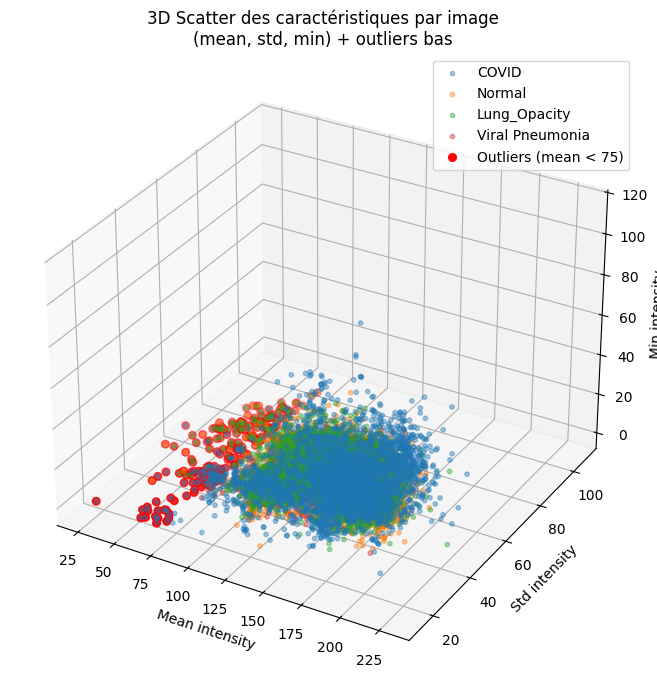

In [37]:
# Définition d’un critère d’outlier simple : mean < 75 (tu peux ajuster)
feat_df['outlier_low_mean'] = feat_df['mean'] < 75

print(f"\nNombre d'images avec mean < 75 : {feat_df['outlier_low_mean'].sum()}")

# Scatter 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# couleurs par catégorie
palette = sns.color_palette("tab10", n_colors=len(categories))
color_map = {cat: palette[i] for i, cat in enumerate(categories)}

for cat in categories:
    df_cat = feat_df[feat_df['category'] == cat]
    ax.scatter(
        df_cat['mean'],
        df_cat['std'],
        df_cat['min'],
        c=[color_map[cat]],
        label=cat,
        alpha=0.4,
        s=10
    )

# surlignage des outliers (mean < 75) en rouge
df_out = feat_df[feat_df['outlier_low_mean']]
ax.scatter(
    df_out['mean'],
    df_out['std'],
    df_out['min'],
    c='red',
    s=30,
    label='Outliers (mean < 75)'
)

ax.set_xlabel('Mean intensity')
ax.set_ylabel('Std intensity')
ax.set_zlabel('Min intensity')
ax.set_title('3D Scatter des caractéristiques par image\n(mean, std, min) + outliers bas')

ax.legend()
plt.tight_layout()
plt.show()
